In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def find_coeff(I_column_name, df, degree = 9):
    I = df[I_column_name].values
    mass = df['Mass (kg)'].values
    A = np.vstack([mass**i for i in range(degree+1)]).T
    B = I
    coeff = np.matmul(np.linalg.inv(A), B)
    return coeff

In [4]:
input_path = 'C://Users//akpat//Desktop//Agnikul//90 days plan//CG Model//CG Estimator V1.0//train data//'

In [6]:
df = pd.read_csv(input_path+'S2_ATF.csv')
df = df.drop([0]).reset_index(drop = True)
df.head()

,Mass (kg),r_cg_x (mm),r_cg_y (mm),r_cg_z (mm),Ixx (kg mm2),Iyx (kg mm2),Iyy (kg mm2),Izx (kg mm2),Izy (kg mm2),Izz (kg mm2)
0,6.836,-2830.176,0,0,1.563055e+05,0.0,5.483686e+07,0.0,0.0,5.483686e+07
1,25.684,-2778.406,0,0,1.085497e+06,0.0,1.988508e+08,0.0,0.0,1.988508e+08
2,54.055,-2727.733,0,0,3.149480e+06,0.0,4.039479e+08,0.0,0.0,4.039479e+08
3,89.457,-2678.404,0,0,6.347931e+06,0.0,6.454554e+08,0.0,0.0,6.454554e+08
4,129.402,-2630.740,0,0,1.041301e+07,0.0,9.019794e+08,0.0,0.0,9.019794e+08


In [8]:
coeffs_df = pd.DataFrame()
I_column_name = 'r_cg_x (mm)'
coeffs = find_coeff(I_column_name, df)
coeffs_df[I_column_name[:3]] = coeffs

def cg_x_func(mass_values):
    # coeffs = coeffs
    return np.sum([coeffs[i] * (mass_values**i) for i in range(len(coeffs))], axis=0)
coeffs

array([-2.85723287e+03,  4.43499799e+00, -7.76118365e-02,  1.22998348e-03,
       -1.28623351e-05,  8.73195264e-08, -3.79929966e-10,  1.02028517e-12,
       -1.53753450e-15,  9.93680239e-19])

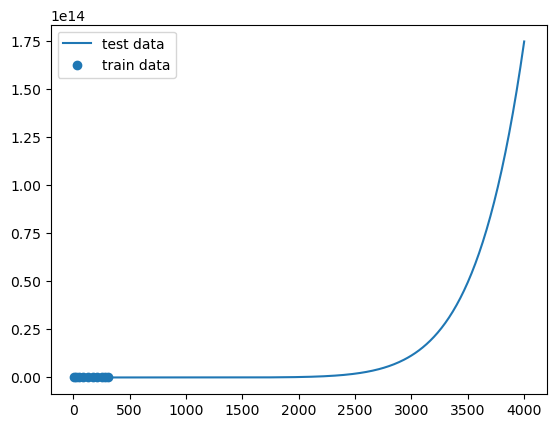

In [68]:
test_point = np.linspace(0,4000,361)
y = []
for i in range(len(test_point)):
    y.append(cg_x_func(test_point[i]))

plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df['r_cg_x (mm)'], label = 'train data')
plt.legend()

In [56]:
m_total = 34070.5
m_atf = m_total/3.2
m_lox = m_total - m_atf
m_lox

23423.46875

In [58]:
m_lox/3

7807.822916666667